In [90]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import levene

In [3]:
# read the English dataset
train_data = pd.read_csv('/Users/zhangshanshan/Desktop/thesis/dataset/processed dataset/english dataset/train_en_dataset.csv')
test_data = pd.read_csv('/Users/zhangshanshan/Desktop/thesis/dataset/processed dataset/english dataset/test_en_dataset.csv')

In [4]:
# concatenate the train and test dataset
full_dataset = pd.concat([train_data, test_data], ignore_index=True)

In [5]:
full_dataset

,id_EXIST,lang,tweet,number_annotators,annotators,gender_annotators,age_annotators,ethnicities_annotators,study_levels_annotators,countries_annotators,labels_task1,labels_task2,labels_task3,split,test_case,id,value
0,201661,en,“mansplaining” is literally just how intellige...,6,"['Annotator_561', 'Annotator_562', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'White or Caucasian', '...","['High school degree or equivalent', 'Master’s...","['Ireland', 'Poland', 'Portugal', 'Portugal', ...","['YES', 'YES', 'NO', 'YES', 'YES', 'YES']","['DIRECT', 'DIRECT', '-', 'JUDGEMENTAL', 'DIRE...","[['IDEOLOGICAL-INEQUALITY'], ['IDEOLOGICAL-INE...",TRAIN_EN,EXIST2024,201661,1.0
1,200610,en,"if you don’t want me but your friend do, dont ...",6,"['Annotator_543', 'Annotator_544', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'other', 'Hispano or La...","['Bachelor’s degree', 'High school degree or e...","['Italy', 'Cyprus', 'Mexico', 'South Africa', ...","['YES', 'YES', 'YES', 'YES', 'YES', 'NO']","['DIRECT', 'DIRECT', 'DIRECT', 'JUDGEMENTAL', ...","[['MISOGYNY-NON-SEXUAL-VIOLENCE'], ['IDEOLOGIC...",TRAIN_EN,EXIST2024,200610,1.0
2,201943,en,@username @username @username @username isn't ...,6,"['Annotator_496', 'Annotator_497', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['Hispano or Latino', 'White or Caucasian', 'W...","['High school degree or equivalent', 'Bachelor...","['Portugal', 'Portugal', 'Poland', 'Mexico', '...","['NO', 'YES', 'YES', 'YES', 'YES', 'NO']","['-', 'REPORTED', 'DIRECT', 'DIRECT', 'DIRECT'...","[['-'], ['STEREOTYPING-DOMINANCE'], ['IDEOLOGI...",TRAIN_EN,EXIST2024,201943,1.0
3,202792,en,@username's account is temporarily unavailable...,6,"['Annotator_714', 'Annotator_715', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['Black or African American', 'White or Caucas...","['Bachelor’s degree', 'Bachelor’s degree', 'Ba...","['South Africa', 'Latvia', 'South Africa', 'It...","['NO', 'NO', 'NO', 'NO', 'NO', 'NO']","['-', '-', '-', '-', '-', '-']","[['-'], ['-'], ['-'], ['-'], ['-'], ['-']]",TRAIN_EN,EXIST2024,202792,0.0
4,201247,en,@username if it wasn't for the gender biases o...,6,"['Annotator_265', 'Annotator_709', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'Black or African Ameri...","['High school degree or equivalent', 'Bachelor...","['Spain', 'South Africa', 'Poland', 'South Afr...","['YES', 'NO', 'YES', 'NO', 'YES', 'YES']","['REPORTED', '-', 'REPORTED', '-', 'REPORTED',...","[['IDEOLOGICAL-INEQUALITY'], ['-'], ['IDEOLOGI...",TRAIN_EN,EXIST2024,201247,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,202040,en,@username @username @username @username @usern...,6,"['Annotator_467', 'Annotator_468', 'Annotator_...","['F', 'F', 'M', 'M', 'M', 'F']","['18-22', '23-45', '18-22', '23-45', '46+', '4...","['White or Caucasian', 'White or Caucasian', '...","['High school degree or equivalent', 'Bachelor...","['Poland', 'Poland', 'Portugal', 'Canada', 'Un...","['YES', 'YES', 'YES', 'YES', 'YES', 'YES']","['DIRECT', 'DIRECT', 'DIRECT', 'DIRECT', 'DIRE...","[['SEXUAL-VIOLENCE'], ['STEREOTYPING-DOMINANCE...",TRAIN_EN,EXIST2024,202040,1.0
3310,400278,en,@username one of these babies could have grown...,6,"['Annotator_805', 'Annotator_426', 'Annotator_...","['F', 'F', 'F', 'M', 'M', 'M']","['18-22', '23-45', '46+', '18-22', '23-45', '4...","['Black or African American', 'White or Caucas...","['Bachelor’s degree', 'Bachelor’s degree', 'Ba...","['South Africa', 'Spain', 'South Africa', 'Pol...","['YES', 'NO', 'NO', 'NO', 'NO', 'NO']","['JUDGEMENTAL', '-', '-', '-', '-', '-']","[['IDEOLOGICAL-INEQUALITY', 'STEREOTYPING-DOMI...",DEV_EN,EXIST2024,400278,0.0
3311,20

In [6]:
# extract the useful features
full_dataset_filtered = full_dataset[['id_EXIST','tweet', 'gender_annotators', 'countries_annotators', 'labels_task1', 'value']]

In [7]:
full_dataset_filtered

,id_EXIST,tweet,gender_annotators,countries_annotators,labels_task1,value
0,201661,“mansplaining” is literally just how intellige...,"['F', 'F', 'M', 'M', 'M', 'F']","['Ireland', 'Poland', 'Portugal', 'Portugal', ...","['YES', 'YES', 'NO', 'YES', 'YES', 'YES']",1.0
1,200610,"if you don’t want me but your friend do, dont ...","['F', 'F', 'M', 'M', 'M', 'F']","['Italy', 'Cyprus', 'Mexico', 'South Africa', ...","['YES', 'YES', 'YES', 'YES', 'YES', 'NO']",1.0
2,201943,@username @username @username @username isn't ...,"['F', 'F', 'M', 'M', 'M', 'F']","['Portugal', 'Portugal', 'Poland', 'Mexico', '...","['NO', 'YES', 'YES', 'YES', 'YES', 'NO']",1.0
3,202792,@username's account is temporarily unavailable...,"['F', 'F', 'M', 'M', 'M', 'F']","['South Africa', 'Latvia', 'South Africa', 'It...","['NO', 'NO', 'NO', 'NO', 'NO', 'NO']",0.0
4,201247,@username if it wasn't for the gender biases o...,"['F', 'F', 'M', 'M', 'M', 'F']","['Spain', 'South Africa', 'Poland', 'South Afr...","['YES', 'NO', 'YES', 'NO', 'YES', 'YES']",1.0
...,...,...,...,...,...,...
3309,202040,@username @username @username @username @usern...,"['F', 'F', 'M', 'M', 'M', 'F']","['Poland', 'Poland', 'Portugal', 'Canada', 'Un...","['YES', 'YES', 'YES', 'YES', 'YES', 'YES']",1.0
3310,400278,@username one of these babies could have grown...,"['F', 'F', 'F', 'M', 'M', 'M']","['South Africa', 'Spain', 'South Africa', 'Pol...","['YES', 'NO', 'NO', 'NO', 'NO', 'NO']",0.0
3311,201854,"@username the nurse from slovenia, 1,2,3, on y...","['F', 'F', 'M', 'M', 'M', 'F']","['South Africa', 'Latvia', 'South Africa', 'It...","['NO', 'NO', 'YES', 'NO', 'NO', 'NO']",0.0
3312,200531,@username okay then make or female. mostly wom...,"['F', 'F', 'M', 'M', 'M', 'F']","['Portugal', 'United States', 'Portugal', 'Sou...","['YES', 'YES', 'YES', 'YES', 'YES', 'YES']",1.0


In [8]:
full_dataset_filtered['gender_annotators'] = full_dataset_filtered['gender_annotators'].apply(eval)
full_dataset_filtered['countries_annotators'] = full_dataset_filtered['countries_annotators'].apply(eval)
full_dataset_filtered['labels_task1'] = full_dataset_filtered['labels_task1'].apply(eval)

/var/folders/6t/pljpl9n528s7n3dk72vx80_h0000gn/T/ipykernel_41823/4100489634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset_filtered['gender_annotators'] = full_dataset_filtered['gender_annotators'].apply(eval)
/var/folders/6t/pljpl9n528s7n3dk72vx80_h0000gn/T/ipykernel_41823/4100489634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_dataset_filtered['countries_annotators'] = full_dataset_filtered['countries_annotators'].apply(eval)
/var/folders/6t/pljpl9n528s7n3dk72vx80_h0000gn/T/i

In [9]:
full_dataset_filtered

,id_EXIST,tweet,gender_annotators,countries_annotators,labels_task1,value
0,201661,“mansplaining” is literally just how intellige...,"[F, F, M, M, M, F]","[Ireland, Poland, Portugal, Portugal, South Af...","[YES, YES, NO, YES, YES, YES]",1.0
1,200610,"if you don’t want me but your friend do, dont ...","[F, F, M, M, M, F]","[Italy, Cyprus, Mexico, South Africa, United K...","[YES, YES, YES, YES, YES, NO]",1.0
2,201943,@username @username @username @username isn't ...,"[F, F, M, M, M, F]","[Portugal, Portugal, Poland, Mexico, Mexico, U...","[NO, YES, YES, YES, YES, NO]",1.0
3,202792,@username's account is temporarily unavailable...,"[F, F, M, M, M, F]","[South Africa, Latvia, South Africa, Italy, Un...","[NO, NO, NO, NO, NO, NO]",0.0
4,201247,@username if it wasn't for the gender biases o...,"[F, F, M, M, M, F]","[Spain, South Africa, Poland, South Africa, Un...","[YES, NO, YES, NO, YES, YES]",1.0
...,...,...,...,...,...,...
3309,202040,@username @username @username @username @usern...,"[F, F, M, M, M, F]","[Poland, Poland, Portugal, Canada, United King...","[YES, YES, YES, YES, YES, YES]",1.0
3310,400278,@username one of these babies could have grown...,"[F, F, F, M, M, M]","[South Africa, Spain, South Africa, Poland, Es...","[YES, NO, NO, NO, NO, NO]",0.0
3311,201854,"@username the nurse from slovenia, 1,2,3, on y...","[F, F, M, M, M, F]","[South Africa, Latvia, South Africa, Italy, Un...","[NO, NO, YES, NO, NO, NO]",0.0
3312,200531,@username okay then make or female. mostly wom...,"[F, F, M, M, M, F]","[Portugal, United States, Portugal, South Afri...","[YES, YES, YES, YES, YES, YES]",1.0


In [10]:
# define the countries that using english as native language
english_speaking_countries = [
    'United States', 'United Kingdom', 'Canada', 'Australia',
    'Ireland', 'New Zealand', 'South Africa'
]

In [11]:
expanded_data = []

In [12]:
# expand the dataset
for _, row in full_dataset_filtered.iterrows():
    for gender, country, label in zip(row['gender_annotators'], row['countries_annotators'], row['labels_task1']):
        expanded_data.append({
            'id_EXIST': row['id_EXIST'],
            'tweet': row['tweet'],
            'gender': gender,
            'country': country,
            'English-native country': 'English Native' if country in english_speaking_countries else 'Non-English Native',
            'individual_label': 1 if label == 'YES' else 0,
            'consensus_label': int(row['value'])
        })

In [13]:
expanded_df = pd.DataFrame(expanded_data)

In [14]:
expanded_df

,id_EXIST,tweet,gender,country,English-native country,individual_label,consensus_label
0,201661,“mansplaining” is literally just how intellige...,F,Ireland,English Native,1,1
1,201661,“mansplaining” is literally just how intellige...,F,Poland,Non-English Native,1,1
2,201661,“mansplaining” is literally just how intellige...,M,Portugal,Non-English Native,0,1
3,201661,“mansplaining” is literally just how intellige...,M,Portugal,Non-English Native,1,1
4,201661,“mansplaining” is literally just how intellige...,M,South Africa,English Native,1,1
...,...,...,...,...,...,...,...
19879,202332,when it comes ‘intersex’ - it’s a term i grew ...,F,Cyprus,Non-English Native,0,0
19880,202332,when it comes ‘intersex’ - it’s a term i grew ...,M,Mexico,Non-English Native,0,0
19881,202332,when it comes ‘intersex’ - it’s a term i grew ...,M,South Africa,English Native,0,0
19882,202332,when it comes ‘intersex’ - it’s a term i grew ...,M,United Kingdom,English Native,0,0


In [82]:
expanded_df.to_csv('expanded_full_dataset.csv', index=False)

In [15]:
# calculate the statistics necessary for the consistency rate 
female_count = len(expanded_df[expanded_df['gender'] == 'F'])

In [16]:
female_count

9942

In [17]:
male_count = len(expanded_df[expanded_df['gender'] == 'M'])

In [18]:
male_count

9942

In [19]:
female_consistent_count = len(expanded_df[(expanded_df['gender'] == 'F') & (expanded_df['individual_label'] == expanded_df['consensus_label'])])

In [20]:
female_consistent_count

8510

In [21]:
female_acc = female_consistent_count / female_count

In [22]:
male_consistent_count = len(expanded_df[(expanded_df['gender'] == 'M') & (expanded_df['individual_label'] == expanded_df['consensus_label'])])

In [23]:
male_consistent_count

8343

In [24]:
male_acc = male_consistent_count / male_count

In [25]:
all_consistent_count = len(expanded_df[(expanded_df['individual_label'] == expanded_df['consensus_label'])])

In [26]:
all_acc = all_consistent_count / len(expanded_df)

In [27]:
female_acc, male_acc, all_acc

(0.855964594648964, 0.8391671695835848, 0.8475658821162744)

In [28]:
expanded_df['is_accurate'] = expanded_df['individual_label'] == expanded_df['consensus_label']

In [29]:
len(expanded_df)

19884

In [30]:
contingency_table = pd.crosstab(expanded_df['gender'], expanded_df['is_accurate'])

In [31]:
contingency_table

is_accurate,False,True
gender,,
F,1432,8510
M,1599,8343


In [32]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

In [33]:
# to check whether the results were significant for teh factor gender
print("Chi2:", chi2_stat)
print("p value:", p_value)
print("degree of freedom:", dof)
print("expected frequencies:\n", expected)

if p_value < 0.05:
    print("The results were significant: gender has a significant effect on annotation accuracy.")
else:
    print("The results were insignificant: gender does not a significant effect on annotation accuracy.")

Chi2: 10.726468788283839
p value: 0.0010561380189652043
degree of freedom: 1
expected frequencies:
 [[1515.5 8426.5]
 [1515.5 8426.5]]
The results were significant: gender has a significant effect on annotation accuracy.


In [34]:
# repeat the previous procudures in nativeness analysis
native_count = len(expanded_df[expanded_df['English-native country'] == 'English Native'])

In [35]:
non_native_count = len(expanded_df[expanded_df['English-native country'] == 'Non-English Native'])

In [36]:
non_native_count

11946

In [37]:
native_consistent_count = len(expanded_df[(expanded_df['English-native country'] == 'English Native') & (expanded_df['individual_label'] == expanded_df['consensus_label'])])

In [38]:
native_consistent_count

6759

In [39]:
non_native_consistent_count = len(expanded_df[(expanded_df['English-native country'] == 'Non-English Native') & (expanded_df['individual_label'] == expanded_df['consensus_label'])])

In [40]:
non_native_consistent_count

10094

In [41]:
native_acc = native_consistent_count / native_count

In [42]:
non_native_acc = non_native_consistent_count / non_native_count

In [43]:
native_acc, non_native_acc, all_acc

(0.8514739229024944, 0.8449690272894693, 0.8475658821162744)

In [44]:
contingency_table_2 = pd.crosstab(expanded_df['English-native country'], expanded_df['is_accurate'])

In [45]:
contingency_table_2

is_accurate,False,True
English-native country,,
English Native,1179,6759
Non-English Native,1852,10094


In [46]:
chi2_stat_2, p_value_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)

In [49]:
print("Chi2:", chi2_stat_2)
print("p value:", p_value_2)
print("degree of freedom:", dof_2)
print("expected frequencies:\n", expected_2)

if p_value_2 < 0.05:
    print("The results were significant: native language has a significant effect on annotation accuracy.")
else:
    print("The results were insignificant: native language does not a significant effect on annotation accuracy.")

Chi2: 1.5119633615632
p value: 0.21883973909604795
degree of freedom: 1
expected frequencies:
 [[ 1210.02202776  6727.97797224]
 [ 1820.97797224 10125.02202776]]
The results were insignificant: native language does not a significant effect on annotation accuracy.


In [51]:
# calculate gender-based consensus label for each tweet
def calculate_consensus(subset):
    count_yes = (subset['individual_label'] == 1).sum()
    count_no = (subset['individual_label'] == 0).sum()
    return 1 if count_yes > count_no else 0


In [52]:
# calculate gender-based consensus label for each tweet
results = []

for tweet_id, group in expanded_df.groupby('id_EXIST'):
    male_consensus = calculate_consensus(group[group['gender'] == 'M'])
    female_consensus = calculate_consensus(group[group['gender'] == 'F'])
    
    tweet_info = group.iloc[0][['id_EXIST', 'tweet', 'consensus_label']].to_dict()
    tweet_info['male_consensus_label'] = male_consensus
    tweet_info['female_consensus_label'] = female_consensus
    
    results.append(tweet_info)

gender_consensus_df = pd.DataFrame(results)

In [53]:
gender_consensus_df.head(40)

,id_EXIST,tweet,consensus_label,male_consensus_label,female_consensus_label
0,200002,writing a uni essay in my local pub with a cof...,1,1,1
1,200003,@username it is 2021 not 1921. i dont apprecia...,1,0,1
2,200006,according to a customer i have plenty of time ...,1,1,1
3,200007,"so only 'blokes' drink beer? sorry, but if you...",1,1,1
4,200008,new to the shelves this week - looking forward...,0,0,0
5,200010,i guess that’s fairly normal for a neanderthal...,0,0,0
6,200011,#everydaysexism means women usually end up in ...,1,1,1
7,200013,@username @username @username @username @usern...,1,1,0
8,200015,@username @username #everydaysexism dear god.c...,1,1,1
9,200016,@username @username @username @username @usern...,1,1,1


In [54]:
# calculate the statistics neccesary for the matrix
female_1_male_1_count = len(gender_consensus_df[(gender_consensus_df['male_consensus_label'] == 1) & (gender_consensus_df['female_consensus_label'] == 1)])
female_0_male_0_count = len(gender_consensus_df[(gender_consensus_df['male_consensus_label'] == 0) & (gender_consensus_df['female_consensus_label'] == 0)])
female_1_male_0_count = len(gender_consensus_df[(gender_consensus_df['male_consensus_label'] == 0) & (gender_consensus_df['female_consensus_label'] == 1)])
female_0_male_1_count = len(gender_consensus_df[(gender_consensus_df['male_consensus_label'] == 1) & (gender_consensus_df['female_consensus_label'] == 0)])

In [55]:
female_1_male_1_count, female_0_male_0_count, female_1_male_0_count, female_0_male_1_count

(1145, 1799, 188, 182)

In [55]:
gender_consensus_df.to_csv('gender_consensus_labels.csv', index=False)

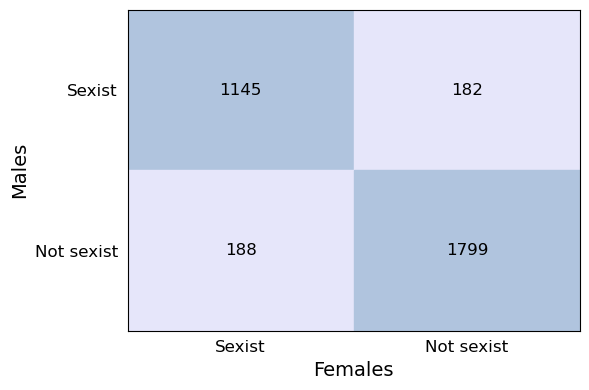

In [130]:
# plot the matrix to see the annotation difference between genders
matrix = np.array([[female_1_male_1_count, female_0_male_1_count],
                   [female_1_male_0_count, female_0_male_0_count]])

x_labels = ['Sexist', 'Not sexist']
y_labels = ['Sexist', 'Not sexist']

colors = np.array([['lightsteelblue', 'lavender'],
                   ['lavender', 'lightsteelblue']])

fig, ax = plt.subplots(figsize=(6, 4))

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        color = colors[i, j]
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
        ax.text(j + 0.5, i + 0.5, str(matrix[i, j]), ha='center', va='center', fontsize=12)

ax.set_xticks(np.arange(len(x_labels)) + 0.5)
ax.set_xticklabels(x_labels, fontsize=12)
ax.set_yticks(np.arange(len(y_labels)) + 0.5)
ax.set_yticklabels(y_labels, fontsize=12)
ax.set_xlabel('Females', fontsize=14)
ax.set_ylabel('Males', fontsize=14)

ax.set_xlim(0, matrix.shape[1])
ax.set_ylim(0, matrix.shape[0])
ax.invert_yaxis()  # To match the example's orientation

ax.grid(False)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

In [56]:
def calculate_consensus(subset):
    count_yes = (subset['individual_label'] == 1).sum()
    count_no = (subset['individual_label'] == 0).sum()
    #  since the annotator's nativeness is not deliberately controlled, in some cases there will be equal votes, these tweets need to be excluded
    if count_yes > count_no:
        return 1
    if count_yes < count_no:
        return 0
    else:
        return 'N/A'


In [57]:

results_language = []

for tweet_id, group in expanded_df.groupby('id_EXIST'):
    native_consensus = calculate_consensus(group[group['English-native country'] == 'English Native'])
    non_native_consensus = calculate_consensus(group[group['English-native country'] == 'Non-English Native'])
    
    tweet_info = group.iloc[0][['id_EXIST', 'tweet', 'consensus_label']].to_dict()
    tweet_info['native_consensus'] = native_consensus
    tweet_info['non_native_consensus'] = non_native_consensus
    
    results_language.append(tweet_info)

language_consensus_df = pd.DataFrame(results_language)

In [58]:
language_consensus_df.head(40)

,id_EXIST,tweet,consensus_label,native_consensus,non_native_consensus
0,200002,writing a uni essay in my local pub with a cof...,1,1,1
1,200003,@username it is 2021 not 1921. i dont apprecia...,1,N/A,1
2,200006,according to a customer i have plenty of time ...,1,1,1
3,200007,"so only 'blokes' drink beer? sorry, but if you...",1,1,1
4,200008,new to the shelves this week - looking forward...,0,0,0
5,200010,i guess that’s fairly normal for a neanderthal...,0,N/A,0
6,200011,#everydaysexism means women usually end up in ...,1,1,1
7,200013,@username @username @username @username @usern...,1,N/A,1
8,200015,@username @username #everydaysexism dear god.c...,1,1,1
9,200016,@username @username @username @username @usern...,1,1,1


In [125]:
language_consensus_df.to_csv('native_consensus_labels.csv', index=False)

In [60]:
# calculate the statistics neccesary for the matrix
native_1_non_1_count = len(language_consensus_df[(language_consensus_df['native_consensus'] == 1) & (language_consensus_df['non_native_consensus'] == 1)])
native_0_non_0_count = len(language_consensus_df[(language_consensus_df['native_consensus'] == 0) & (language_consensus_df['non_native_consensus'] == 0)])
native_1_non_0_count = len(language_consensus_df[(language_consensus_df['native_consensus'] == 1) & (language_consensus_df['non_native_consensus'] == 0)])
native_0_non_1_count = len(language_consensus_df[(language_consensus_df['native_consensus'] == 0) & (language_consensus_df['non_native_consensus'] == 1)])


In [61]:
native_1_non_1_count, native_0_non_0_count, native_1_non_0_count, native_0_non_1_count

(939, 1499, 144, 126)

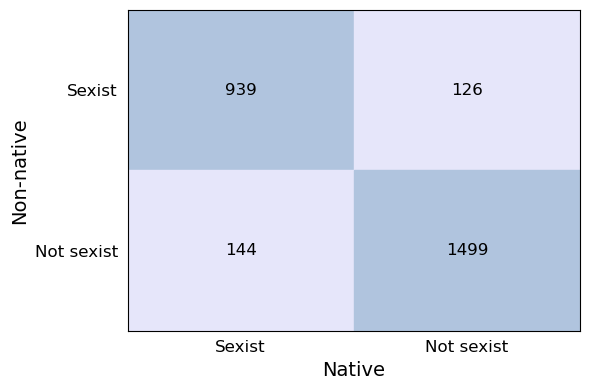

In [122]:
# plot the matrix to see the annotation difference between genders
matrix = np.array([[native_1_non_1_count, native_0_non_1_count],
                   [native_1_non_0_count, native_0_non_0_count]])

x_labels = ['Sexist', 'Not sexist']
y_labels = ['Sexist', 'Not sexist']

colors = np.array([['lightsteelblue', 'lavender'],
                   ['lavender', 'lightsteelblue']])

fig, ax = plt.subplots(figsize=(6, 4))

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        color = colors[i, j]
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color))
        ax.text(j + 0.5, i + 0.5, str(matrix[i, j]), ha='center', va='center', fontsize=12)

ax.set_xticks(np.arange(len(x_labels)) + 0.5)
ax.set_xticklabels(x_labels, fontsize=12)
ax.set_yticks(np.arange(len(y_labels)) + 0.5)
ax.set_yticklabels(y_labels, fontsize=12)
ax.set_xlabel('Native', fontsize=14)
ax.set_ylabel('Non-native', fontsize=14)

ax.set_xlim(0, matrix.shape[1])
ax.set_ylim(0, matrix.shape[0])
ax.invert_yaxis()  # To match the example's orientation

ax.grid(False)
ax.tick_params(left=False, bottom=False)

plt.tight_layout()
plt.show()

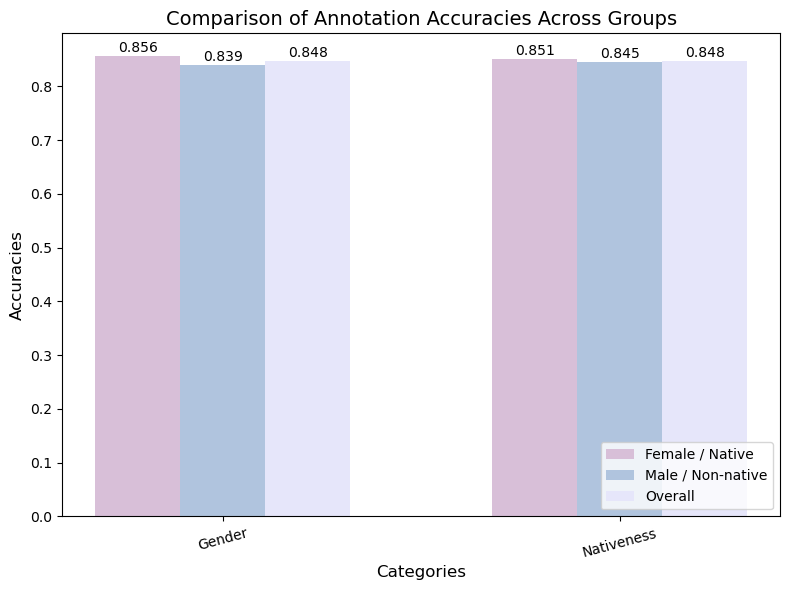

In [124]:
categories = ['Gender', 'Nativeness']
bar_width = 0.12

# female
gender_group1 = [0.856] 
# male
gender_group2 = [0.839] 
# overall
gender_group3 = [0.848]  

# native
nativeness_group1 = [0.851]  
# Non-native
nativeness_group2 = [0.845]  
# overall
nativeness_group3 = [0.848]  

group1_acc = gender_group1 + nativeness_group1
group2_acc = gender_group2 + nativeness_group2
group3_acc = gender_group3 + nativeness_group3

x = np.arange(len(categories)) * 0.56
x_group1 = x - bar_width
x_group2 = x
x_group3 = x + bar_width
fig, ax = plt.subplots(figsize=(8,6))

bar1 = ax.bar(x_group1, group1_acc, bar_width, label='Female / Native', color='thistle')
bar2 = ax.bar(x_group2, group2_acc, bar_width, label='Male / Non-native', color='lightsteelblue')
bar3 = ax.bar(x_group3, group3_acc, bar_width, label='Overall', color='lavender')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.002, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Accuracies', fontsize=12)
ax.set_title('Comparison of Annotation Accuracies Across Groups', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10, rotation=15)
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

In [91]:
# statistical analysis of the model performance
female_acc = [0.7978883861236803, 0.7948717948717948, 0.7918552036199095, 0.7903469079939668, 0.7978883861236803, 0.7888386123680241, 0.7933634992458521, 0.7948717948717948, 0.7888386123680241, 0.7933634992458521]
male_acc = [0.7858220211161387, 0.7782805429864253, 0.7843137254901961, 0.7918552036199095, 0.7888386123680241, 0.7828054298642534, 0.7873303167420814, 0.7933634992458521, 0.779788838612368, 0.7843137254901961]

# use the Shapiro-Wilk test to check whether the data is normally distributed (p-value > 0.05)
stat_acc_f, p_acc_f = shapiro(female_acc)
stat_acc_m, p_acc_m = shapiro(male_acc)
print("Shapiro-Wilk Test (Female acc):", stat_acc_f, p_acc_f)
print("Shapiro-Wilk Test (Male Acc):", stat_acc_m, p_acc_m)

Shapiro-Wilk Test (Female acc): 0.9265665826884619 0.41498248567553875
Shapiro-Wilk Test (Male Acc): 0.9739250732580925 0.9246615371390798


In [77]:
female_acc_mean = np.mean(female_acc)
female_acc_std = np.std(female_acc, ddof=1)  

male_acc_mean = np.mean(male_acc)
male_acc_std = np.std(male_acc, ddof=1)
print(female_acc_mean, female_acc_std)
print(male_acc_mean, male_acc_std)

0.793212669683258 0.0032930161676848527
0.7856711915535445 0.004845884669691884


In [103]:
variance_result_acc = levene(female_acc, male_acc, center= 'mean')

In [104]:
# If the p-value for the Levene test is greater than 0.05，the homogeneity assumption of the variance is met
variance_result_acc

LeveneResult(statistic=1.252539116113068, pvalue=0.27778111201112715)

In [86]:
# independent t-test is performed to find whether the accuracy is significantly different acriss the two groups of data trained with differnt labels
t_stat_acc, p_value_acc = ttest_ind(female_acc, male_acc, equal_var=True)

print("T-statistic:", t_stat_acc)
print("P-value:", p_value_acc)

T-statistic: 4.070440155969474
P-value: 0.0007179253209603136


In [98]:
female_f1 = [0.7640845070422535, 0.7638888888888888, 0.7661016949152543, 0.7655986509274874, 0.7657342657342657, 0.7586206896551724, 0.7728026533996684, 0.7597173144876325, 0.7526501766784452,  0.7513611615245009]
male_f1 = [ 0.761744966442953, 0.7292817679558011, 0.7404718693284936, 0.770764119601329, 0.7610921501706485, 0.7684887459807074, 0.7393715341959335, 0.7583774250440917, 0.759075907590759, 0.7530224525043178]        
# if the p-value > 0.05, the data is normally distributed.
stat_f1_f, p_f1_f = shapiro(female_f1)
stat_f1_m, p_f1_m = shapiro(male_f1)
print("Shapiro-Wilk Test (Female F1):", stat_f1_f, p_f1_f)
print("Shapiro-Wilk Test (Male F1):", stat_f1_m, p_f1_m)

Shapiro-Wilk Test (Female F1): 0.9345201056545285 0.49379203352143064
Shapiro-Wilk Test (Male F1): 0.9170761276743606 0.33321263601532014


In [99]:
female_f1_mean = np.mean(female_f1)
female_f1_std = np.std(female_f1, ddof=1)  

male_f1_mean = np.mean(male_f1)
male_f1_std = np.std(male_f1, ddof=1)
print(female_f1_mean, female_f1_std)
print(male_f1_mean, male_f1_std)

0.7620560003253568 0.006544993277389443
0.7541690938815035 0.01355987648079124


In [105]:
# If the p-value for the Levene test is greater than 0.05，the homogeneity assumption of the variance is met
variance_result_f1 = levene(female_f1, male_f1, center= 'mean')

In [106]:
variance_result_f1

LeveneResult(statistic=5.068152447143823, pvalue=0.037101476155115394)

In [102]:
# Welch’s t -test  is performed to find whether the accuracy is significantly different acriss the two groups of data trained with differnt labels
t_stat_f1, p_value_f1 = ttest_ind(female_f1, male_f1, equal_var=False)

print("T-statistic:", t_stat_f1)
print("P-value:", p_value_f1)

T-statistic: 1.6564336515082725
P-value: 0.12159932027903733


female:
(0.7978883861236803, 0.7640845070422535)
(0.7948717948717948, 0.7638888888888888)
(0.7918552036199095, 0.7661016949152543)
(0.7903469079939668, 0.7655986509274874)
(0.7978883861236803, 0.7657342657342657)
(0.7888386123680241, 0.7586206896551724)
(0.7933634992458521, 0.7728026533996684)
(0.7948717948717948, 0.7597173144876325)
(0.7888386123680241, 0.7526501766784452)
(0.7933634992458521, 0.7513611615245009)


male: 
(0.7858220211161387, 0.761744966442953)
(0.7782805429864253, 0.7292817679558011)
(0.7843137254901961, 0.7404718693284936)
(0.7918552036199095, 0.770764119601329)
(0.7888386123680241, 0.7610921501706485)
(0.7828054298642534, 0.7684887459807074)
(0.7873303167420814, 0.7393715341959335)
(0.7933634992458521, 0.7583774250440917)
(0.779788838612368, 0.759075907590759)
(0.7843137254901961, 0.7530224525043178)


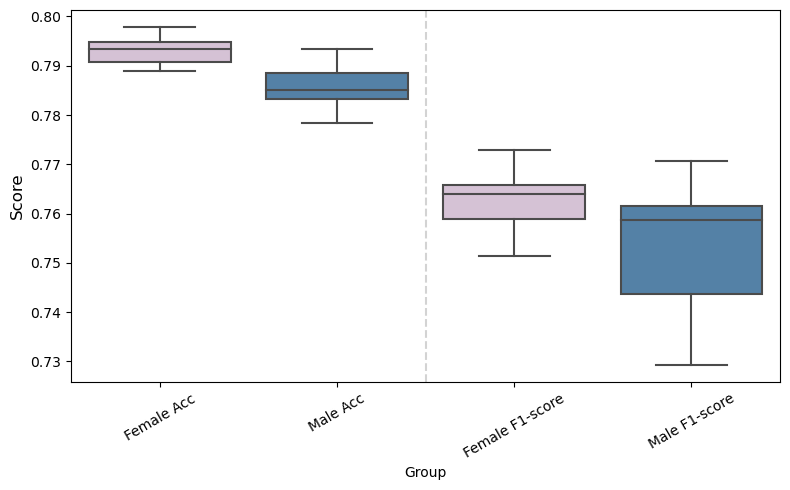

In [85]:
# plot box plot of the group-based consensus label
data = {
    'Group': [
        'Female Acc', 'Male Acc', 
        'Female F1-score', 'Male F1-score'
    ],
    'Score': [
        [0.7978883861236803, 0.7948717948717948, 0.7918552036199095, 0.7903469079939668, 0.7978883861236803, 0.7888386123680241, 0.7933634992458521, 0.7948717948717948, 0.7888386123680241, 0.7933634992458521],
        [0.7858220211161387, 0.7782805429864253, 0.7843137254901961, 0.7918552036199095, 0.7888386123680241, 0.7828054298642534, 0.7873303167420814, 0.7933634992458521, 0.779788838612368, 0.7843137254901961],
        [0.7640845070422535, 0.7638888888888888, 0.7661016949152543, 0.7655986509274874, 0.7657342657342657, 0.7586206896551724, 0.7728026533996684, 0.7597173144876325, 0.7526501766784452,  0.7513611615245009],
        [0.761744966442953, 0.7292817679558011, 0.7404718693284936, 0.770764119601329, 0.7610921501706485, 0.7684887459807074, 0.7393715341959335, 0.7583774250440917, 0.759075907590759, 0.7530224525043178]
 
    ]
}

flattened_data = []
for group, scores in zip(data['Group'], data['Score']):
    for score in scores:
        flattened_data.append({'Group': group, 'Score': score})

df = pd.DataFrame(flattened_data)

palette = {
    'Female Acc': 'thistle',
    'Male Acc': 'steelblue',
    'Female F1-score': 'thistle',
    'Male F1-score': 'steelblue'
}

plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='Score', data=df, palette=palette)

plt.axvline(1.5, color='lightgrey', linestyle='--', linewidth=1.5)
plt.ylabel('Score', fontsize=12)
# plt.xlabel('Group', fontsize=12)
plt.xticks(rotation=30, fontsize=10)

plt.tight_layout()
plt.show()